# Project 4

### Random Walk Modeling, Exploring 1D Ising Model, Bisection Root-Finding Technique

#### Written by Owen Morehead - 4/29/2020

In [1]:
#Relevant modules

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


In [15]:
##Just some code to use to change the color or bold of any text throughout the notebook.

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Multi-dimension MC integration

We discussed at length 1-dimensional MC integration, and we surmised that MC techniques become important for multi-dimensional integrals. Let's see that here. We want to evaluate the ten-dimensional integral

$$I=\int_0^1 dx_1\int_0^1 dx_2...\int_0^1 dx_{10} (x_1+x_2+....+x_{10})^2$$

and we will compare the result with the analytic result $\frac{155}{6}$ and with a trapezoid rule integration, in the following problem. 


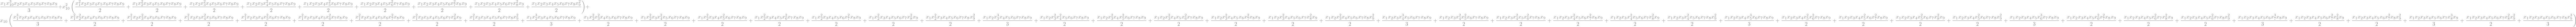

In [3]:
# Using sympy to verify the result of  155/6:
from sympy import *
init_printing(use_unicode=True)
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10=symbols('x1 x2 x3 x4 x5 x6 x7 x8 x9 x10') # tell sympy about the symbols we want to use
integrate((x1+x2+x3+x4+x5+x6+x7+x8+x9+x10)*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10),x1,x2,x3,x4,x5,x6,x7,x8,x9,x10)

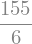

In [5]:
#Inputting the limits to evaluate the integrand
integrate((x1+x2+x3+x4+x5+x6+x7+x8+x9+x10)**2,
          (x1,0,1),(x2,0,1),(x3,0,1),(x4,0,1),(x5,0,1),(x6,0,1),(x7,0,1),
          (x8,0,1),(x9,0,1),(x10,0,1))

In [50]:
print('155/6 =', 155/6)

155/6 = 25.833333333333332


a) Now we implement a MC integration of $I$ using $N$ uniformly generated random points. We do this for $N=2^p$, where $p=5, 6, 7, ...18$ (so the largest $N$ is 262144). We plot the absolute value of the error vs $\sqrt{N}$ on a log-log plot. There will be statistical fluctuations, so averaging many results per value of $N$ can be useful.


$$h= \frac{b-a}{N-1},\qquad x_{i} = a + (i-1) h, \qquad i=1, N,$$

Note: we start our counting at $i = 1$. 

$$\int_{x_{i}}^{x_{i}+h}f(x) dx \simeq \frac{h(f_{i}+f_{i+1})}{2} =
\frac{1}{2}hf_{i} + \frac{1}{2}hf_{i+1}.$$





$$
\int_{a}^{b}f(x)  dx \simeq \frac{h}{2}f_{1} + hf_{2}
  +hf_{3} + \cdots + hf_{N-1} + \frac{h}{2}f_{N} .$$

Notes:
  - internal points are counted twice (as the end of one interval and as the beginning of the next), so they have *total weights* of $h/2 + h/2 = h$, 
  - endpoints are counted just once, so they have *total weights* of $h/2$. 
  
For the trapezoid algorithm, the weight set is:
$$w_i= \{ \frac{h}{2}, h, h, ..., h, h, \frac{h}{2}\}$$

For N= 32 I= 25.35840 +/- 1.47272
For N= 64 I= 23.55255 +/- 1.17973
For N= 128 I= 25.97332 +/- 0.73539
For N= 256 I= 25.91815 +/- 0.60216
For N= 512 I= 26.70872 +/- 0.43867
For N= 1024 I= 25.65225 +/- 0.27514
For N= 2048 I= 25.72444 +/- 0.19886
For N= 4096 I= 25.88959 +/- 0.14387
For N= 8192 I= 25.84855 +/- 0.10072
For N= 16384 I= 25.74532 +/- 0.07181
For N= 32768 I= 25.80066 +/- 0.05067
For N= 65536 I= 25.84013 +/- 0.03590
For N= 131072 I= 25.86394 +/- 0.02545
For N= 262144 I= 25.80031 +/- 0.01794


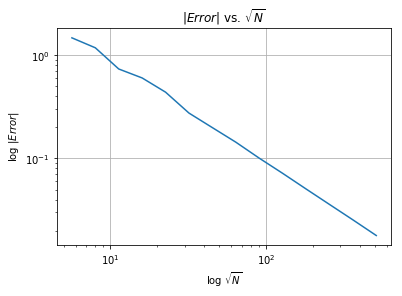

In [51]:
def I(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10):
    return ((x1+x2+x3+x4+x5+x6+x7+x8+x9+x10)**2)
ps = np.arange(5,19)
#ps = np.array(ps)
N = [2**p for p in ps]
all_N = []
all_errors = []
for n in N:
    sum = 0.
    sum2 = 0.
    result = 0.
    for i in range(n):
        x1=np.random.random()
        x2=np.random.random()
        x3=np.random.random()
        x4=np.random.random()
        x5=np.random.random()
        x6=np.random.random()
        x7=np.random.random()
        x8=np.random.random()
        x9=np.random.random()
        x10 = np.random.random()
        sum += I(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10)
        sum2 += (I(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10)**2)
    result = sum/n
    sigma = np.sqrt((sum2/n - pow(sum/n,2))/n)
    print("For N=", n, "I=",'%.5f'% result, "+/-" ,'%.5f'% sigma)
    all_N.append(np.sqrt(n))
    all_errors.append(np.abs(sigma))
plt.plot(all_N,all_errors)
plt.xscale('log') 
plt.yscale('log')
plt.title(r'$|Error|$ vs. $\sqrt{N}$')
plt.xlabel(r'log $\sqrt{N}$')
plt.ylabel(r'log $|Error|$')
plt.grid()

b) Let's now compare with a Trapeoid integration. In this case we must distribute the $N$ points over an evenly spaced mesh spanning the $D$-dimensional space, so the integration steps are coarse. We are required to sum $100^D$ terms to perform a standard numerical integration. This is a numerically expensive operation for large D. 

We will therefore investigate $D=7$. If we limit $N$ to around the size of the largest value from part (a) and distribute those points over 7 dimensions, we can have at most 6 points for each dimension (for a total of $279,936$ points). As the integration limits are 0 to 1, $h=0.2$.


In [54]:
#Trapezoid integration

D = 7
N = 6
h = 0.2

def f(x_args):
    return np.sum(x_args)**2

summ = 0
w = np.zeros(7)

for i1 in range(0,N):       #nested loops for each integration variable. Calculating all the weights
    w[0] = h/2 if (i1 == 0 or i1 == N-1) else h
    for i2 in range(0,N):
        w[1] = h/2 if (i2 == 0 or i2 == N-1) else h
        for i3 in range(0,N):
            w[2] = h/2 if (i3 == 0 or i3 == N-1) else h
            for i4 in range(0,N):
                w[3] = h/2 if (i4 == 0 or i4 == N-1) else h
                for i5 in range(0,N): 
                    w[4] = h/2 if (i5 == 0 or i5 == N-1) else h
                    for i6 in range(0,N): 
                        w[5] = h/2 if (i6 == 0 or i6 == N-1) else h
                        for i7 in range(0,N): 
                            w[6] = h/2 if (i7 == 0 or i7 == N-1) else h
                            
                            x = np.multiply(h,[i1,i2,i3,i4,i5,i6,i7])   #x is an array of h * each variable
                            summ += f(x)*np.prod(w)
                            
print('trapezoid integration for D = 7:', summ)
                        

trapezoid integration for D = 7: 12.879999999998978


In [55]:
#Another way to code this trapezoid integration

xs = np.linspace(0,1,20)
fs = xs

fs = fs[:, np.newaxis] + xs   #creating a multidimensional linspace
fs = fs[:,:, np.newaxis] + xs
fs = fs[:,:,:, np.newaxis] + xs
fs = fs[:,:,:,:, np.newaxis] + xs
fs = fs[:,:,:,:,:, np.newaxis] + xs
fs = fs[:,:,:,:,:,:, np.newaxis] + xs
fs = fs**2


    
fs[:,:,:,:,:,:,0] = fs[:,:,:,:,:,:,0] /2
fs[:,:,:,:,:,:,-1] = fs[:,:,:,:,:,:,-1] /2

fs[:,:,:,:,:,0] = fs[:,:,:,:,:,0] /2
fs[:,:,:,:,:,-1] = fs[:,:,:,:,:,-1] /2

fs[:,:,:,:,0] = fs[:,:,:,:,0] /2
fs[:,:,:,:,-1] = fs[:,:,:,:,-1] /2

fs[:,:,:,0] = fs[:,:,:,0] /2
fs[:,:,:,-1] = fs[:,:,:,-1]/2

fs [:,:,0] = fs[:,:,0] /2
fs [:,:,-1] = fs[:,:,-1] /2

fs [:,0] = fs[:,0] /2
fs [:,-1] = fs[:,-1] /2

fs [0] = fs[0] /2
fs [-1] = fs[-1] /2


np.sum(fs) * (xs[1] - xs[0])**7



In [56]:
#Most precise trapezoidal integration code


xs = np.linspace(0,1,20)
fs = xs
ndim = 7
for n in range(ndim-1):
    fs = fs[...,np.newaxis] + xs
fs = fs**2

for axis in range(len(fs.shape)):
    fs[0] = fs[0] / 2
    fs[-1] = fs[-1] / 2
    fs = np.sum(fs,axis=0) * (xs[1]-xs[0])
    
print('Trapezoid integration result for 7 dimension integral:',fs)


Trapezoid integration result for 7 dimension integral: 12.836565096952901


In [57]:
#Using MC tecnique for D = 7

def I(x1,x2,x3,x4,x5,x6,x7):
    return ((x1+x2+x3+x4+x5+x6+x7)**2)
#ps = np.arange(5,19)
#ps = np.array(ps)
N = [6**7]
all_N = []
all_errors = []
for n in N:
    sum = 0.
    sum2 = 0.
    result = 0.
    for i in range(n):
        x1=np.random.random()
        x2=np.random.random()
        x3=np.random.random()
        x4=np.random.random()
        x5=np.random.random()
        x6=np.random.random()
        x7=np.random.random()
        
        sum += I(x1,x2,x3,x4,x5,x6,x7)
        sum2 += (I(x1,x2,x3,x4,x5,x6,x7)**2)
    result = sum/n
    sigma = np.sqrt((sum2/n - pow(sum/n,2))/n)
    print("For N=", n, "I=",'%.5f'% result, "+/-" ,'%.5f'% sigma)
    

For N= 279936 I= 12.82775 +/- 0.01022


c) Lastly we use sympy to calcualte the analytic answer and compare with MC and Trapezoid results.

In [6]:
init_printing(use_unicode=True)
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10=symbols('x1 x2 x3 x4 x5 x6 x7 x8 x9 x10') # tell sympy about the symbols we want to use


print('sympy integration result:', integrate((x1+x2+x3+x4+x5+x6+x7)**2,
          (x1,0,1),(x2,0,1),(x3,0,1),(x4,0,1),(x5,0,1),(x6,0,1),(x7,0,1)))


print('77/6 =', 77./6.)

sympy integration result: 77/6
77/6 = 12.833333333333334


We see all our values from MC, trapezoid and sympy compare nicely. 

## Random Walk Modelling

We can adapt the random walk to estimate how well a lead wall provides shielding against a beam of neutrons. We model the situation as follows:

  - For simplicity, work in 2 dimensions ($x$ and $y$). In other words, all the action takes place in the plane $z=0$.
  - Each neutron enters the lead wall in the $x$ direction at position $x=y=0$, at normal incidence. In other words, the face of the wall is along $y$ at $x=0$.
  - The neutron travels a one-unit distance in the $x$ direction. Then it collides with a lead atom and rebounds in a random direction (*i.e*, assume the scattering probability is uniform in $\theta$.) 
  - The neutron travels a one-unit distance in the new direction and collides with another lead atom and rebounds in another new direction, and so on. There is always a one-unit distance between collisions.
  - Having lost some energy in each collision, after 15 collisions the neutron stops. Thus, you track each neutron through up to 15 collisions.
  - Make the wall 5 units thick in the $x$ direction and effectively infinite in $\pm y$. If the neutron makes it through the wall ($x>5$), or exits the front face of the wall ($x<0$), it has escaped (no need to track it further).

We simulate 100,000 neutrons and explore what fraction of the incident neutrons pass through to the other side of the wall.



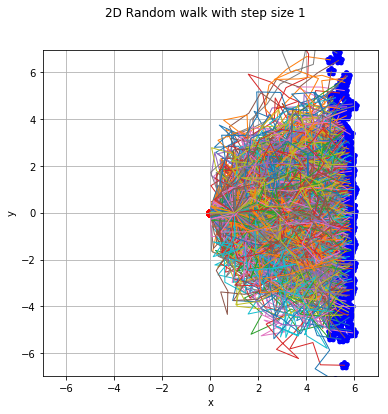

Fraction of neutrons that made it past the 5 unit thick wall = 0.10490 or 10.49 percent


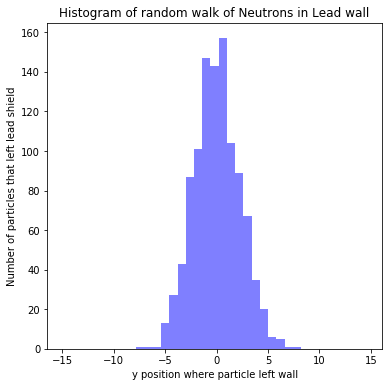

In [73]:
#2D random walk to explore lead wall shielding against neutrons

sum_of_R = []

neutrons = np.arange(1,10001)  #amount of neutrons
x = 0.    #starting x position
y = 0.    #starting y position
xs_otherside = []
ys_otherside = []
Nsteps = 15   #neutron stops after 15 steps / collisions


for n in neutrons:
    xvalues = [0,1]  #next position is at (x,y) = (1,0), then it collides with lead atom there
    yvalues = [0,0]
    x = 0.
    y = 0.
    x = 1.
    theta = 2.*np.pi*np.random.random(Nsteps+1)
    for i in range(1,Nsteps+1):
        x += np.cos(theta[i])
        y += np.sin(theta[i])
        xvalues.append(x)
        yvalues.append(y)
        R = np.sqrt(x*x+y*y)
        if x > 5:                  #if x position greater or equal to 5 units, it made it past the wall
            xs_otherside.append(x)
            ys_otherside.append(y)
            
            #plotting only the trajectory of the neutrons that make it past the other side of the wall
            plt.plot(xvalues, yvalues,'-', lw=1)
            plt.scatter(xvalues[0], yvalues[0], lw = 5,  color='red',marker = ".", label = "Starting point for neutron #{}".format(n))
            plt.scatter(xvalues[-1], yvalues[-1], lw = 5, color='blue',marker = "*", label = "End point for neutron #{}".format(n))
            break
        if x < 0:
            break
    
    #print("Final x,y value = ({},{})".format(x,y))
      
    #print('Took {} steps'.format(i))
    
    
   

fig1=plt.figure(1,[6,6])
ax=fig1.gca()
ax.grid(True)
ysize=xsize=1.8*np.sqrt(Nsteps)
ax.set_ylim([-ysize, ysize])
ax.set_xlim([-xsize, xsize])
fig1.suptitle('2D Random walk with step size 1')
cmap=plt.cm.gist_rainbow
plt.xlabel('x')
plt.ylabel('y')
#plt.legend(loc=(1.1,0),shadow=True)
plt.show()

#print("Final radial distance from origin is %.2f" % R)

print("Fraction of neutrons that made it past the 5 unit thick wall = %.5f or %.2f percent"%(len(xs_otherside)/len(neutrons),len(xs_otherside)/len(neutrons)*100))

bins = np.arange(-15,15,.8)
n, binsa, patches = plt.hist(ys_otherside, bins, facecolor='blue', alpha=0.5, align='mid')
plt.xlabel('y position where particle left wall')
plt.ylabel('Number of particles that left lead shield')
plt.title(r'Histogram of random walk of Neutrons in Lead wall')
plt.show()

#The random walk path of each neutron took a very long time to run for 100,000 neutrons. I was able to successfuly 
#run it once but I ended up running it only for 10,000 neutrons so the trajectory plot would run in a timely manner

In [7]:
#Expanding to a three dimensional random walk simulation

def simulate_neutron3D():    
    xs = [1.0]
    ys = [0.0]
    zs = [0.0]
    
    for i in range(14):
        # θ ϵ (0, π)
        #theta = np.pi * np.random.rand()
        # ϕ ϵ (0, 2π)
        #phi = 2.0 * np.pi * np.random.rand()
        deltas = 2.0 * np.random.rand(3) - 1.0
        deltas = deltas / np.sqrt(np.sum(deltas**2))
        dx, dy, dz = deltas
        
        #xs.append(xs[i] + np.sin(theta) * np.cos(phi))
        #ys.append(ys[i] + np.sin(theta) * np.sin(phi))
        #zs.append(zs[i] + np.cos(theta))
        xs.append(xs[i] + dx)
        ys.append(ys[i] + dy)
        zs.append(zs[i] + dz)
        
        if xs[-1] > 5.0 or xs[-1] < 0.0:
            break
    return xs, ys, zs

In [8]:
sims = [simulate_neutron3D() for _ in range(100000)]

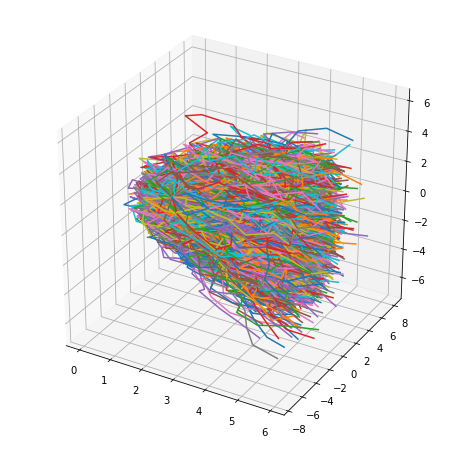

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
yfinals=[]
zfinals=[]

for sim in sims:
    if sim[0][-1] > 5.0:
        ax.plot(sim[0],sim[1],sim[2])
        yfinals.append(sim[1][-1])
        zfinals.append(sim[2][-1])

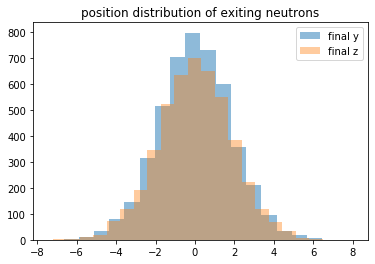

In [10]:
plt.hist(yfinals,bins=20,alpha=0.5,label='final y');
plt.hist(zfinals,bins=20,alpha=0.4,label='final z');
plt.title("position distribution of exiting neutrons");
plt.legend();

## 1-Dimensional Ising Model

Revisit the 1-dimensional Ising model calculation we did in class (Lectures4.ipynb). 

Recall that the Hamiltonian for the Ising model (in 1D) is given by:

\begin{align}
    H = -J\sum_{i=0}^{N} S_{i}S_{i+1} - B\mu\sum_{i=0}^{N}S_{i}
\end{align}

Here $J$ is the spin-spin interaction strength, $B$ is the magnetic field strength, $\mu$ is the magnetic momoment (assuming they're all the same) and $S_{i}$ is the spin configuration of the particle at position $i$. We take the spin configuration to be discrete, i.e. $S_{i} = -1$ or $1$ (down or up).

To perform our simulation, we will be updating every spin once per step. To decide if a spin should be flipped, we will calculate the change in energy of the system if the spin is flipped. The probability of flipping the spin goes like:

\begin{align}
    P \propto e^{-\Delta E / k_{b}T}
\end{align}

To update the spin, we will draw a uniform random number $r$ and compare it with $e^{-\Delta E / k_{b}T}$. If $r < e^{-\Delta E / k_{b}T}$, then we will flip the spin. Otherwise, we will leave it as it was.


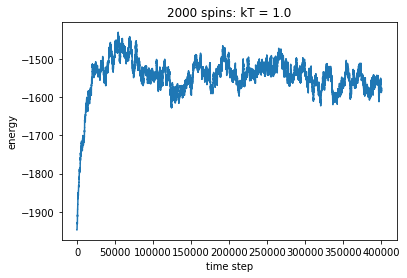

In [74]:
def energy(S,J,mu,B):                                  
    FirstTerm = 0.
    SecondTerm = 0.                                          
    for i in range(-1,len(S)-1):    # by starting with index -1, we can implement periodic boundary conditions
        FirstTerm += -J*S[i]*S[i+1]
    for i in range(0,N):   
        SecondTerm += -mu*S[i]*B
    return (FirstTerm + SecondTerm); 


def delta_energy(S, J, mu, B, random_site):
    """Function that calculates the change in energy after every run
       Takes much less computational power than calculating the total energy every time as done previously
    """
    return 2*J*S[random_site]*(S[random_site-1]+S[random_site + 1]) + 2*mu*S[random_site]*B

def ising(state0,num_steps,J, mu, B, kT,):
    ES = energy(state0,J,mu,B)
    energy_values = []
    energy_values.append(ES)
    state = np.zeros([num_steps,N])        # spin states: up(1), down (-1)
    state[0,:]=state0
    step_index_values = []
    
    for istep in range(1,num_steps):
        #test_state = list(state[istep-1,:])
        random_site = int(N*np.random.random()) - 1
        energy_change = delta_energy(state[istep-1,:],J,mu,B,random_site)  #calculating the energy change
        ET = ES + energy_change

        R = np.exp((ES-ET)/(kT))           # Boltzmann test
        state[istep,:]=state[istep -1,:]
        #print(ET, ES, R)
        if R > np.random.random():
            #state[istep,:] = test_state      # replace the state
            state[istep,random_site] *= -1    #flip the spin
            ES = ET
            
        energy_values.append(ES)

    return state, energy_values;

#eliminated the code from lecture that was for debugging purposes. This made the computational time faster

N     = 2000               # number of spin sites                                     
num_steps = 200*N          # number of iterations
B     = 0.08               # magnetic field                               
mu    = .33                # g mu (not needed if B=0)
J     = 1.                 # exchange energy                              
k     = 1.                 # Boltzmann constant
T     = 1.                 # Temperature
np.random.seed() 
state0=np.empty(N) ; state0.fill(-1.)
kT=k*T
state, energy_values=ising(state0,num_steps,J, mu, B, kT)
istep = np.zeros(num_steps)        
for i, item in enumerate(energy_values):
    istep[i]=i
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(istep, energy_values)
plt.xlabel('time step')
plt.ylabel('energy')
plt.title('%d spins: kT = %.1f' % (N, k*T))
plt.show()


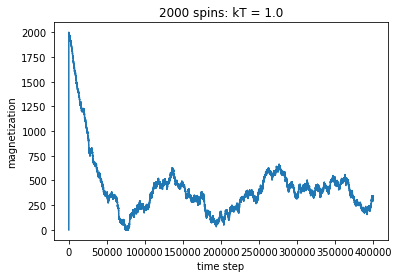

Magnetization averged over the second half of the run:  385.31227


In [69]:
# let's look at the magnetization
mags = np.zeros(num_steps).astype('float')
for i in range (1,num_steps):
    mags[i]=abs(np.sum(state[i,:]))
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(range(1,num_steps), mags[0:-1])
plt.xlabel('time step')
plt.ylabel('magnetization')
plt.title('%d spins: kT = %.1f' % (N, k*T))
plt.show()
magav=np.average(mags[int(num_steps/2):num_steps])
print("Magnetization averged over the second half of the run: ",magav)



Comparing the simulation result with the analytic result for the magnetization (Landau Eqn. 17.9), with the $\mu_B$ explicit:

$$
M = \frac{N e^{J/kT} \sinh(\mu_B B/kT)}
{\sqrt{e^{2J/kT} \sinh^2 (\mu_B B/kT) + e^{-2J/kT}}}
$$

In [62]:
N     = 2000               # number of spin sites                                     
num_steps = 200*N           # number of iterations
B     = 0.08                # magnetic field                               
mu    = .33                # g mu (not needed if B=0)
J     = 1.                 # exchange energy                              
k     = 1.                 # Boltzmann constant
T     = 1. 



M = (N * np.e**(J/(k*T))*np.sinh(mu*B/(k*T)))/(np.sqrt(np.e**(2*J/(k*T))*np.sinh(mu*B/(k*T))**(2)+np.e**(-2*J/(k*T))))
print(M)

382.96737376016233


Good confirmation from this Magnetization equaiton. We see the magnetization averaged over the second half of the run is 385.3 for B = 0.08, and the magnetizaiton calculated from the equation above with the same magnetic field value is 383.0. 

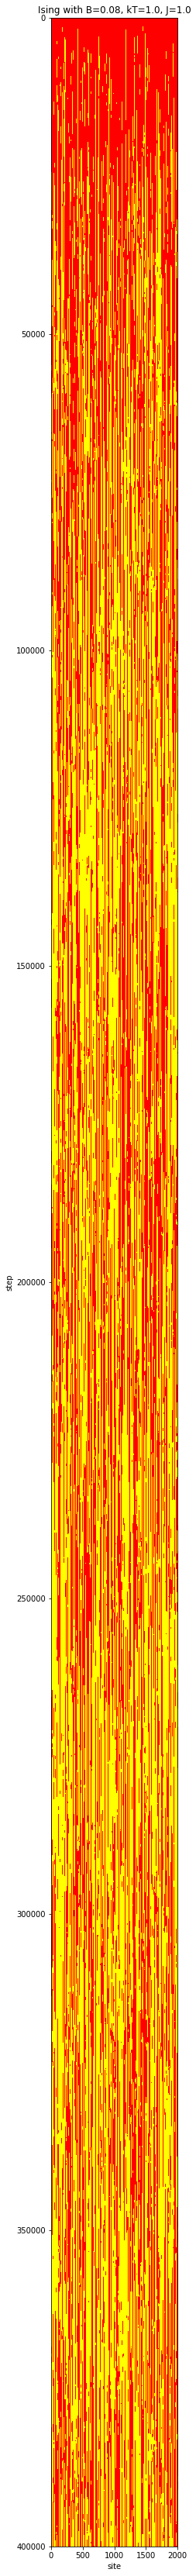

In [70]:
#plotting the Ising model

img = np.zeros([num_steps,N]).astype('int')
for i in range (0,num_steps):
    img[i,:]=state[i,:]
plt.rcParams["figure.figsize"] = [10,60]
plt.title('Ising with B='+str(B)+', kT='+str(k*T)+', J='+str(J))
plt.xlabel('site')
plt.ylabel('step')
plt.imshow(img, cmap=plt.cm.autumn, aspect=0.1)
plt.rcParams["figure.figsize"] = [6,6]





## Applying the Bisection Root-Finding Technique to a Physics Application

In Quantum Mechanics, when solving the finite well problem, the spatially even bound states were found to be associated with the solutions to a transcendental equation:

$$\tan(z)=\sqrt{(z_0/z)^2-1}$$

where $z_0$ is a dimensionless parameter related to the depth and width of the well (smaller $z_0$ is a shallower and/or narrower well). Here we solve the problem for $z_0=8$.

Find those three root values of $z$ numerically with precision $10^{-3}$. We check that the results match expectation.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


Text(0, 0.5, 'functions')

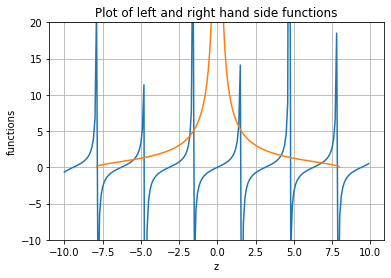

In [12]:
#Plotting the left and right hand sides of the equation

z0 = 8.
z = np.arange(-10,10,.1)
rhs = np.sqrt((z0/z)**2 - 1)
plt.plot(z,np.tan(z))
plt.plot(z,rhs)
plt.grid()
plt.ylim(-10,20)

plt.title('Plot of left and right hand side functions')
plt.xlabel('z')
plt.ylabel('functions')


We see there should be 3 positive roots where both graphs cross paths around x = 1.5, 4, 7.
I will find them with multiple different methods. Starting with the most efficient method using the newton package from scipy.optimize. Then I will use a manual bisection root finding tecnique. 

Solutions found at:

1.395
4.165
6.831


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


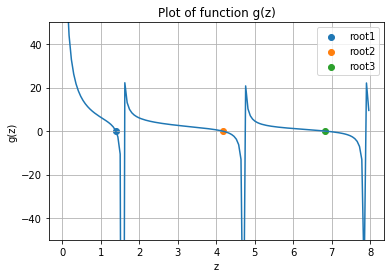

In [13]:
#scipy newton searching method. We can easily find all three roots by calling newton on the test function, 
#with the initial position we want to test nearest to

from scipy.optimize import newton

def g(z): # test function, finite square well
    z0=8.
    return np.sqrt((z0/z)**2-1) - np.tan(z)

root1 = newton(g, 1)
root2 = newton(g, 3)
root3 = newton(g, 7)

print("Solutions found at:\n")
print("%.3f"%root1)
print("%.3f"%root2)
print("%.3f"%root3)
#print("%.2f"%newton(g, 7.*np.pi/2.))

new_xvalues = np.linspace(0,12,200)
new_fvalues = g(new_xvalues)
plt.plot(new_xvalues, new_fvalues)
plt.scatter(root1,0,label='root1')
plt.scatter(root2,0,label='root2')
plt.scatter(root3,0,label='root3')

plt.grid()
plt.ylim(-50.,50.)
plt.title('Plot of function g(z)')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.legend()
plt.show()

In [16]:
#Newton-Raphson Search with forward difference

import numpy as np

zs = [1.1,4,5]
dz = 3.e-1
eps = 1.e-3
imax = 100        # Max number of iterations

def g(z): # test function
    z0=8.
    return np.sqrt((z0/z)**2-1) - np.tan(z)

for z in zs:
    for it in range(0, imax + 1):
        F = g(z)
        if ( abs(F) <= eps ):           # Check for convergence
            print(color.BOLD, "\n Root found at z = %.7f, g(z) = %.5e, precision eps = %e" % (z, F, eps)) 
            break
        print(color.END,"Iteration ", it, " z = ", z, " g(z) = ", F)
        df = (g(z + dz) - g(z))/dz           # Forward difference
        dz =  -F/df 
        z += dz                              # New guess
    
    
#this method only finds one of the roots at a time dependeing on where we set
#I therefore ran through a list of 3 starting z values that worked to find the 3 different roots.

 Iteration  0  z =  1.1  g(z) =  5.238889555717723
 Iteration  1  z =  1.3904755724863875  g(z) =  0.18042032017931486
 Iteration  2  z =  1.3865975221706672  g(z) =  0.31481733759097175
 Iteration  3  z =  1.3960125915948824  g(z) =  -0.02029388568208823
 Iteration  4  z =  1.3954932251706147  g(z) =  -0.0010031642012462427
 
 Root found at z = 1.3954661, g(z) = 2.43314e-06, precision eps = 1.000000e-03
 Iteration  0  z =  4  g(z) =  0.5742295252192997
 Iteration  1  z =  4.196800192952837  g(z) =  -0.1416890450423527
 Iteration  2  z =  4.17639513379207  g(z) =  -0.04972747003323863
 
 Root found at z = 4.1646870, g(z) = 6.08564e-04, precision eps = 1.000000e-03
 Iteration  0  z =  5  g(z) =  4.629514605926266
 Iteration  1  z =  5.346747915864302  g(z) =  2.472022144339567
 Iteration  2  z =  6.397419099231553  g(z) =  0.6361068827711059
 Iteration  3  z =  6.657374420352907  g(z) =  0.2736599049860424
 Iteration  4  z =  6.823522012197838  g(z) =  0.01212328494978454
 Iteration  5 

In [17]:
# Root finding with bisection method
roots = []
def f(z): # test function
    z0=8.
    return np.sqrt((z0/z)**2-1) - np.tan(z)

def bisection(zminus, zplus, Nmax, eps):
    for it in range(0,Nmax):
        z=(zminus+zplus)/2                     # Mid point
        print(color.END, "iteration %2d: x = %.6f and f(x) = %9.6f" % (it, z, f(z)))
        if (f(zplus)*f(z))>0:                      # Root in other half
            zplus=z                            # Change x+ to x
        else:
            zminus=z                           # Change x- to x
        if(zplus-zminus<eps):                           # Converged?
            print("root found with precision = ",eps)
            break
        if it==Nmax-1:
             print(color.BOLD, "root not found after Nmax iterations ")   
    return z  

eps=1e-3
a=np.array([0, np.pi /2 + .1, 5,2*np.pi + .1])  #array of starting values to iterate through. 
b=np.array([np.pi /2 -.1, 4.5, 5/2*np.pi - .1]) #array of ending values to iterate to.
                                                #I dodged values of nπ/2 by making staritng values slightly above nπ/2 
                                                #and by making ending values slightly smaller than nπ/2
Nmax=100

for c,d in zip(a, b):        #running through arrays of starting and ending values to find the three roots
    root=bisection(c, d, Nmax, eps)
    roots.append(root)
    print(color.BOLD, "Root = %.7f"%root)




 iteration  0: x = 0.735398 and f(x) =  9.927715
 iteration  1: x = 1.103097 and f(x) =  5.203127
 iteration  2: x = 1.286947 and f(x) =  2.707437
 iteration  3: x = 1.378872 and f(x) =  0.568774
 iteration  4: x = 1.424834 and f(x) = -1.277437
 iteration  5: x = 1.401853 and f(x) = -0.244279
 iteration  6: x = 1.390362 and f(x) =  0.184421
 iteration  7: x = 1.396107 and f(x) = -0.023828
 iteration  8: x = 1.393235 and f(x) =  0.081746
 iteration  9: x = 1.394671 and f(x) =  0.029331
 iteration 10: x = 1.395389 and f(x) =  0.002845
root found with precision =  0.001
 Root = 1.3953893
 iteration  0: x = 3.085398 and f(x) =  2.448515
 iteration  1: x = 3.792699 and f(x) =  1.095254
 iteration  2: x = 4.146350 and f(x) =  0.076211
 iteration  3: x = 4.323175 and f(x) = -0.881189
 iteration  4: x = 4.234762 and f(x) = -0.329254
 iteration  5: x = 4.190556 and f(x) = -0.112946
 iteration  6: x = 4.168453 and f(x) = -0.015398
 iteration  7: x = 4.157401 and f(x) =  0.031103
 iteration  8: x

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


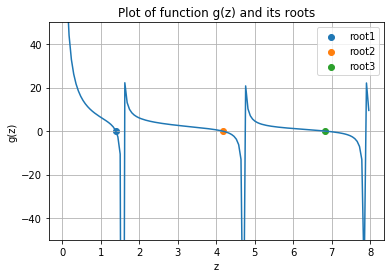

In [18]:
#making a plot of our equation and the three roots. Same plot as above but roots calculated with manual bisection tecnique

new_xvalues = np.linspace(0,12,200)
new_fvalues = g(new_xvalues)
plt.plot(new_xvalues, new_fvalues)
labels = ['root1','root2','root3']
for root,lab in zip(roots,labels):
    plt.scatter(root,0,label=lab)


plt.grid()
plt.ylim(-50.,50.)
plt.title('Plot of function g(z) and its roots')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.legend()
plt.show()

Again we see that these values do correctly coorespond to the zeros of our initial equation as seen in the plot above. 